### MPI Scalability strong

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# load data
df_1 = pd.read_csv('exercise1/mpi_scalability_strong/log_ms_ord_3_10000.csv', sep=';')
df_2 = pd.read_csv('exercise1/mpi_scalability_strong/log_ms_static_30_10000_2.csv', sep=';')
df_3 = pd.read_csv('exercise1/mpi_scalability_strong/log_ms_static_30_1_20000.csv', sep=';')
df_4 = pd.read_csv('exercise1/mpi_scalability_strong/log_ms_static_30_2_20000.csv', sep=';')
df_5 = pd.read_csv('exercise1/mpi_scalability_strong/log_ms_static_30_1_30000.csv', sep=';')
df_6 = pd.read_csv('exercise1/mpi_scalability_strong/log_ms_static_30_2_30000.csv', sep=';')

def extract_info(df):
    # Extract nproc
    df['nproc'] = df['info'].str.extract(r'-n(\d*)')
    df['nproc'] = df['nproc'].replace('', '0')  # replace empty strings with '0'
    df['nproc'] = df['nproc'].fillna('0')  # fill NaN values with '0'
    # Extract nnodes
    df['nnodes'] = df['info'].str.extract(r'-N(\d*)')
    df['nnodes'] = df['nnodes'].replace('', '0')  # replace empty strings with '0'
    df['nnodes'] = df['nnodes'].fillna('0')  # fill NaN values with '0'
    # Extract ssize
    df['ssize'] = df['info'].str.extract(r'-k(\d*)')
    df['ssize'] = df['ssize'].replace('', '0')  # replace empty strings with '0'
    df['ssize'] = df['ssize'].fillna('0')  # fill NaN values with '0'
    # Extract nthreads
    df['nthreads'] = df['info'].str.extract(r'-numthreads:(\w+)')
    df['nthreads'] = df['nthreads'].replace('', '0')  # replace empty strings with '0'
    df['nthreads'] = df['nthreads'].fillna('0')  # fill NaN values with '0'
    # Extract map
    df['map'] = df['info'].str.extract(r'-m:(\w+)')
    # Remove the info column
    df = df.drop(columns=['info'])
    # Convert extracted columns to appropriate data types
    df = df.astype({'nproc': 'int32', 'nnodes': 'int32', 'ssize': 'int32', 'nthreads': 'int32'})
    return df

# Apply the function to all dataframes
df_1 = extract_info(df_1)
df_2 = extract_info(df_2)
df_3 = extract_info(df_3)
df_4 = extract_info(df_4)
df_5 = extract_info(df_5)
df_6 = extract_info(df_6)

# Make an union of all dataframes
#df = pd.concat([df_1, df_2, df_3, df_4, df_5])
df = pd.concat([df_1, df_2, df_3, df_4, df_5, df_6])
display(df)

,file,program,mode,size,step,time_taken,nproc,nnodes,ssize,nthreads,map
0,miofile_10000,mpi_openmp,0,10000,3,23.924110,1,2,10000,0,core
1,miofile_10000,mpi_openmp,0,10000,3,12.905243,2,2,10000,0,core
2,miofile_10000,mpi_openmp,0,10000,3,7.681512,4,2,10000,0,core
3,miofile_10000,mpi_openmp,0,10000,3,5.508912,6,2,10000,0,core
4,miofile_10000,mpi_openmp,0,10000,3,4.583370,8,2,10000,0,core
...,...,...,...,...,...,...,...,...,...,...,...
9,miofile_30000,mpi_openmp,1,30000,30,123.520952,18,2,30000,0,core
10,miofile_30000,mpi_openmp,1,30000,30,112.728052,20,2,30000,0,core
11,miofile_30000,mpi_openmp,1,30000,30,103.933792,22,2,30000,0,core
12,miofile_30000,mpi_openmp,1,30000,30,96.862814,24,2,30000,0,core


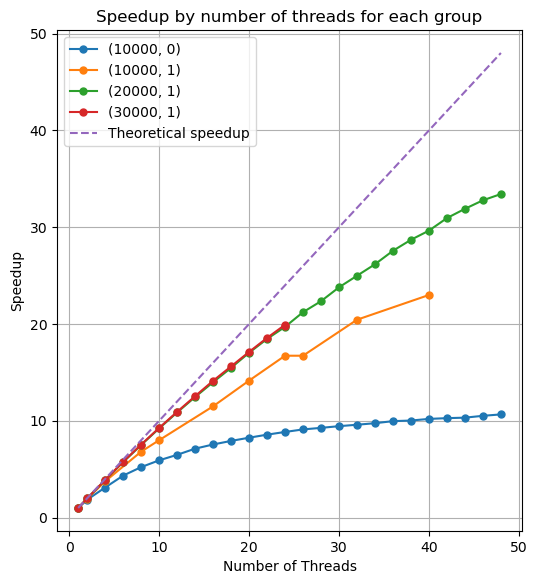

In [2]:
# Group by 'ssize' and 'mode'
grouped = df.groupby(['ssize', 'mode'])

# Create a wider figure
fig, ax = plt.subplots(figsize=(6,6.5))  # Adjust the width as needed

# Plot speedup for each group
for name, group in grouped:
    # Calculate Tserial (time taken when number of tasks is 1) for each group
    Tserial = group[group['nproc'] == 1]['time_taken'].values[0]
    
    # Calculate speedup
    group['speedup'] = Tserial / group['time_taken']
    
    ax.plot(group.nproc, group.speedup, marker='o', linestyle='-', ms=5, label=name)

# Plot theoretical speedup
nprocs = np.arange(1, df['nproc'].max() + 1)
ax.plot(nprocs, nprocs, linestyle='--', label='Theoretical speedup')

ax.legend()
plt.xlabel('Number of Threads')
plt.ylabel('Speedup')
plt.title('Speedup by number of threads for each group')
plt.grid(True)
plt.show()

### MPI Scalability Weak

In [3]:
df = pd.read_csv('exercise1/mpi_scalability_weak/mpi_sw.csv', sep=';')

df = extract_info(df)
df.head(100)

,file,program,mode,size,step,time_taken,nproc,nnodes,ssize,nthreads,map
0,playground_10000,mpi_openmp,0,10000,5,39.867451,1,3,10000,0,socket
1,playground_10000,mpi_openmp,1,10000,5,35.447320,1,3,10000,0,socket
2,playground_14143,mpi_openmp,0,14143,5,42.606072,2,3,10000,0,socket
3,playground_14143,mpi_openmp,1,14143,5,37.685482,2,3,10000,0,socket
4,playground_17321,mpi_openmp,0,17321,5,45.547842,3,3,10000,0,socket
5,playground_17321,mpi_openmp,1,17321,5,39.535082,3,3,10000,0,socket
6,playground_20000,mpi_openmp,0,20000,5,47.303834,4,3,10000,0,socket
7,playground_20000,mpi_openmp,1,20000,5,40.686788,4,3,10000,0,socket
8,playground_22361,mpi_openmp,0,22361,5,49.830179,5,3,10000,0,socket
9,playground_22361,mpi_openmp,1,22361,5,42.502825,5,3,10000,0,socket


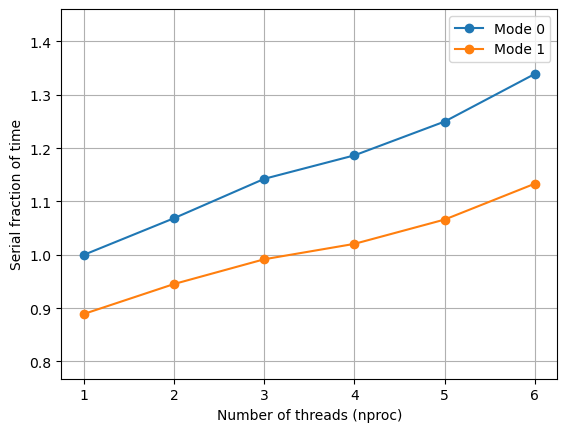

In [4]:
import matplotlib.pyplot as plt

# Group by 'nproc' and 'mode' and calculate mean time taken
grouped = df.groupby(['nproc', 'mode'])['time_taken'].mean().reset_index()

# Calculate the parallel fraction
grouped['parallel_fraction'] = (grouped.loc[grouped['nproc'] == 1, 'time_taken'].values[0] - grouped['time_taken']) / grouped.loc[grouped['nproc'] == 1, 'time_taken'].values[0]

# Calculate the serial fraction
grouped['serial_fraction'] = 1 - grouped['parallel_fraction']

# Plot the data
for mode in grouped['mode'].unique():
    subset = grouped[grouped['mode'] == mode]
    plt.plot(subset['nproc'], subset['serial_fraction'], label=f'Mode {mode}', marker='o', linestyle='-')

plt.xlabel('Number of threads (nproc)')
plt.ylabel('Serial fraction of time')

# Get current y-axis limits
ymin, ymax = plt.ylim()

# Set new y-axis limits with 10% margin
plt.ylim(ymin - 0.2*(ymax-ymin), ymax + 0.2*(ymax-ymin))

plt.legend()
plt.grid(True)
plt.show()

### OMP Scalability

In [5]:
# Load data

df_1 = pd.read_csv('exercise1/omp_scalability/log_omp_ord_25000.csv', sep=';')
df_2 = pd.read_csv('exercise1/omp_scalability/log_omp_static_25000.csv', sep=';')

# Extract information
df_1 = extract_info(df_1)
df_2 = extract_info(df_2)

# Make an union of all dataframes
df = pd.concat([df_1, df_2])

df


,file,program,mode,size,step,time_taken,nproc,nnodes,ssize,nthreads,map
0,miofile_omp_25000,mpi_openmp,0,25000,5,144.0,2,1,25000,1,socket
1,miofile_omp_25000,mpi_openmp,0,25000,5,79.0,2,1,25000,2,socket
2,miofile_omp_25000,mpi_openmp,0,25000,5,57.0,2,1,25000,3,socket
3,miofile_omp_25000,mpi_openmp,0,25000,5,46.0,2,1,25000,4,socket
4,miofile_omp_25000,mpi_openmp,0,25000,5,40.0,2,1,25000,5,socket
5,miofile_omp_25000,mpi_openmp,0,25000,5,35.0,2,1,25000,6,socket
6,miofile_omp_25000,mpi_openmp,0,25000,5,33.0,2,1,25000,7,socket
7,miofile_omp_25000,mpi_openmp,0,25000,5,30.0,2,1,25000,8,socket
8,miofile_omp_25000,mpi_openmp,0,25000,5,29.0,2,1,25000,9,socket
9,miofile_omp_25000,mpi_openmp,0,25000,5,27.0,2,1,25000,10,socket


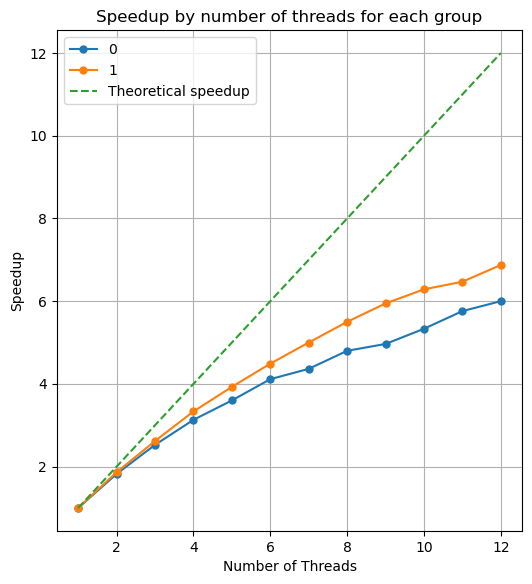

In [6]:
# Group by 'ssize' and 'mode'
grouped = df.groupby('mode')

# Create a wider figure
fig, ax = plt.subplots(figsize=(6,6.5))  # Adjust the width as needed

# Plot speedup for each group
for name, group in grouped:
    # Calculate Tserial (time taken when number of tasks is 1) for each group
    Tserial = group[group['nthreads'] == 1]['time_taken'].values[0]
    
    # Calculate speedup
    group['speedup'] = Tserial / group['time_taken']
    
    ax.plot(group.nthreads, group.speedup, marker='o', linestyle='-', ms=5, label=name)

# Plot theoretical speedup
nthreads = np.arange(1, df['nthreads'].max() + 1)
ax.plot(nthreads, nthreads, linestyle='--', label='Theoretical speedup')

ax.legend()
plt.xlabel('Number of Threads')
plt.ylabel('Speedup')
plt.title('Speedup by number of threads for each group')
plt.grid(True)
plt.show()

## Exercise 02

In [10]:
import pandas as pd
import os

root_dirs = ['EPYC', 'THIN']
sub_dirs = ['fixed_cores', 'fixed_size']
sub_sub_dirs = ['close', 'spread']
csv_files = ['d_blis_double.csv', 'd_blis_float.csv', 'd_mkl_double.csv', 'd_mkl_float.csv', 'd_openblas_double.csv', 'd_openblas_float.csv']

dataframes = {}

merged_dataframes = {}

# Iterate over directories and subdirectories
for root_dir in root_dirs:
    for sub_dir in sub_dirs:
        for sub_sub_dir in sub_sub_dirs:
            dfs = []  # list to store DataFrames for each csv_file
            for csv_file in csv_files:
                path = os.path.join(os.getcwd(), "exercise2", root_dir, sub_dir, sub_sub_dir, csv_file)
                if os.path.exists(path):
                    df = pd.read_csv(path, sep=',')
                    library_type, data_type = csv_file.split('_')[1:3]  # extract library type and data type from csv_file name
                    df['library_type'] = library_type
                    df['data_type'] = data_type
                    dfs.append(df)
            if dfs:  # if dfs is not empty
                merged_df = pd.concat(dfs, ignore_index=True)  # concatenate DataFrames along the row axis
                merged_dataframes[os.path.join(root_dir, sub_dir, sub_sub_dir)] = merged_df  # add merged_df to dictionary

# Print all merged dataframes
for path, df in merged_dataframes.items():
    print(path)
    print(df)
    print()

EPYC/fixed_cores/close
     matrix_size  time_mean(s)   time_sd  GFLOPS_mean   GFLOPS_sd  \
0           2000      0.014467  0.003256  1138.369094  147.120218   
1           3000      0.043852  0.004554  1242.211988  105.272418   
2           4000      0.120561  0.007552  1066.028260   69.326146   
3           5000      0.304208  0.018658   824.769930   48.366240   
4           6000      0.498949  0.028550   868.377758   44.732650   
..           ...           ...       ...          ...         ...   
109        16000      3.044112  0.334659  2718.317587  248.598817   
110        17000      3.761599  0.323623  2628.339751  188.047288   
111        18000      4.094253  0.216986  2856.070514  136.327909   
112        19000      4.843172  0.368648  2846.420928  184.514496   
113        20000      4.748225  0.290329  3380.023944  169.559832   

    library_type   data_type  
0           blis  double.csv  
1           blis  double.csv  
2           blis  double.csv  
3           blis  double

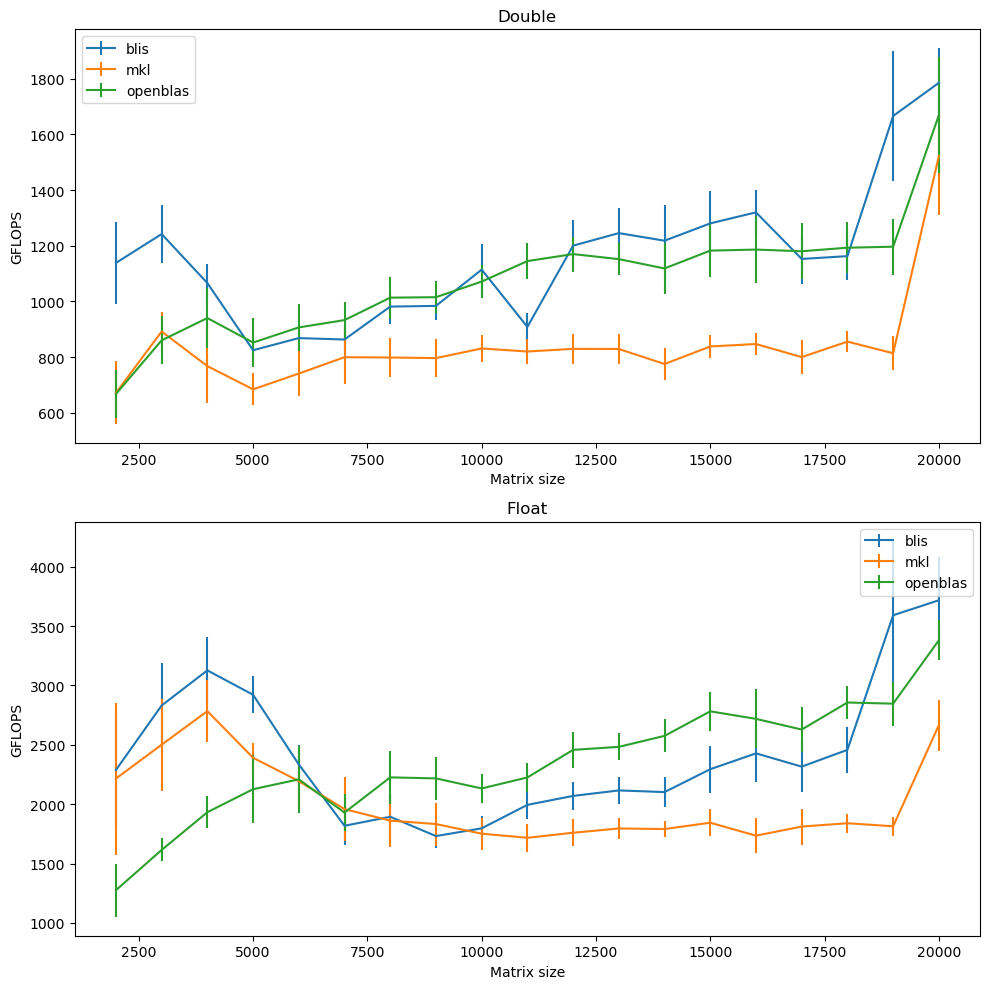

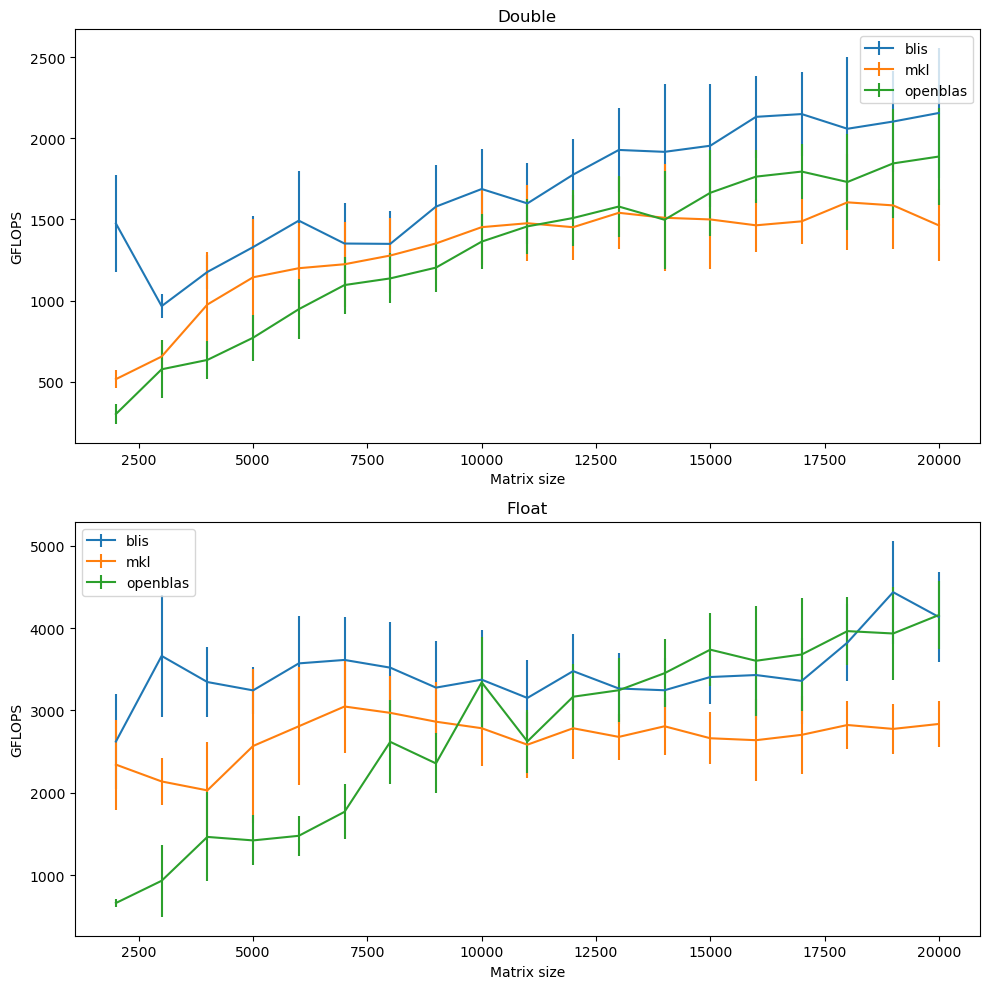

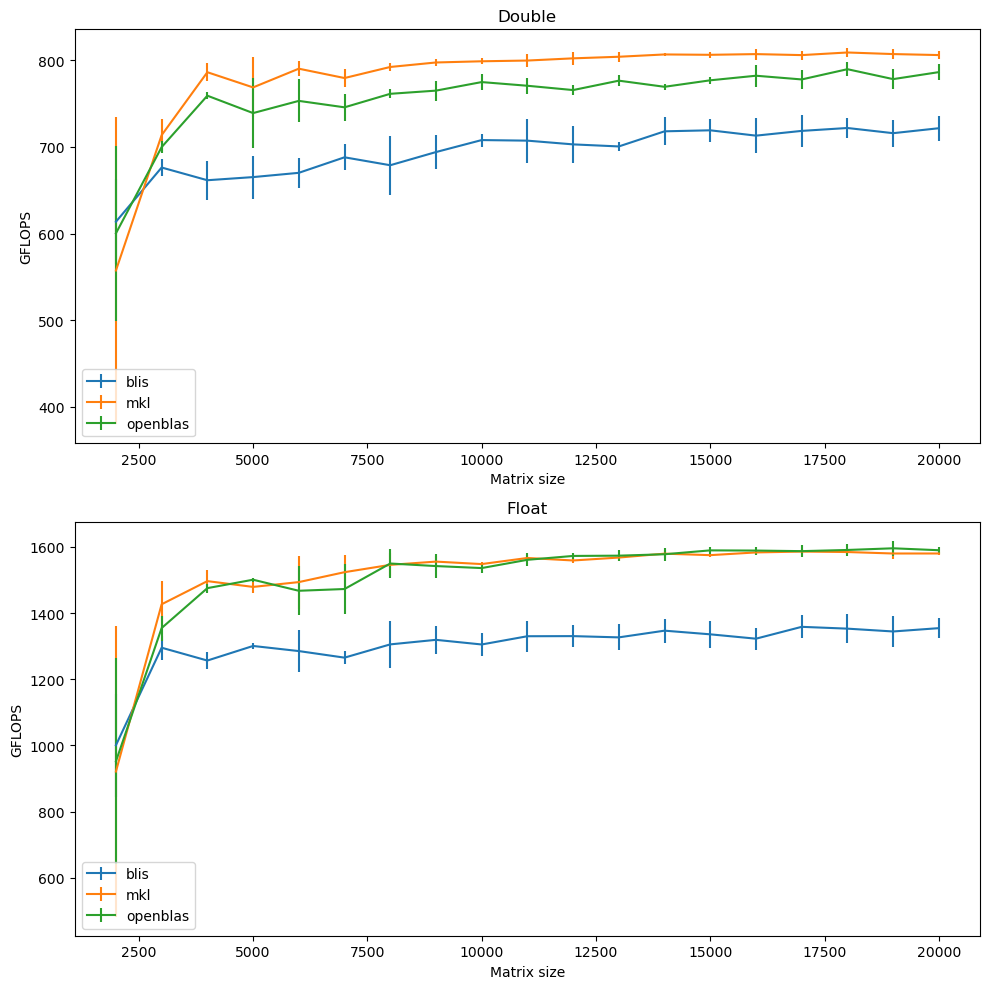

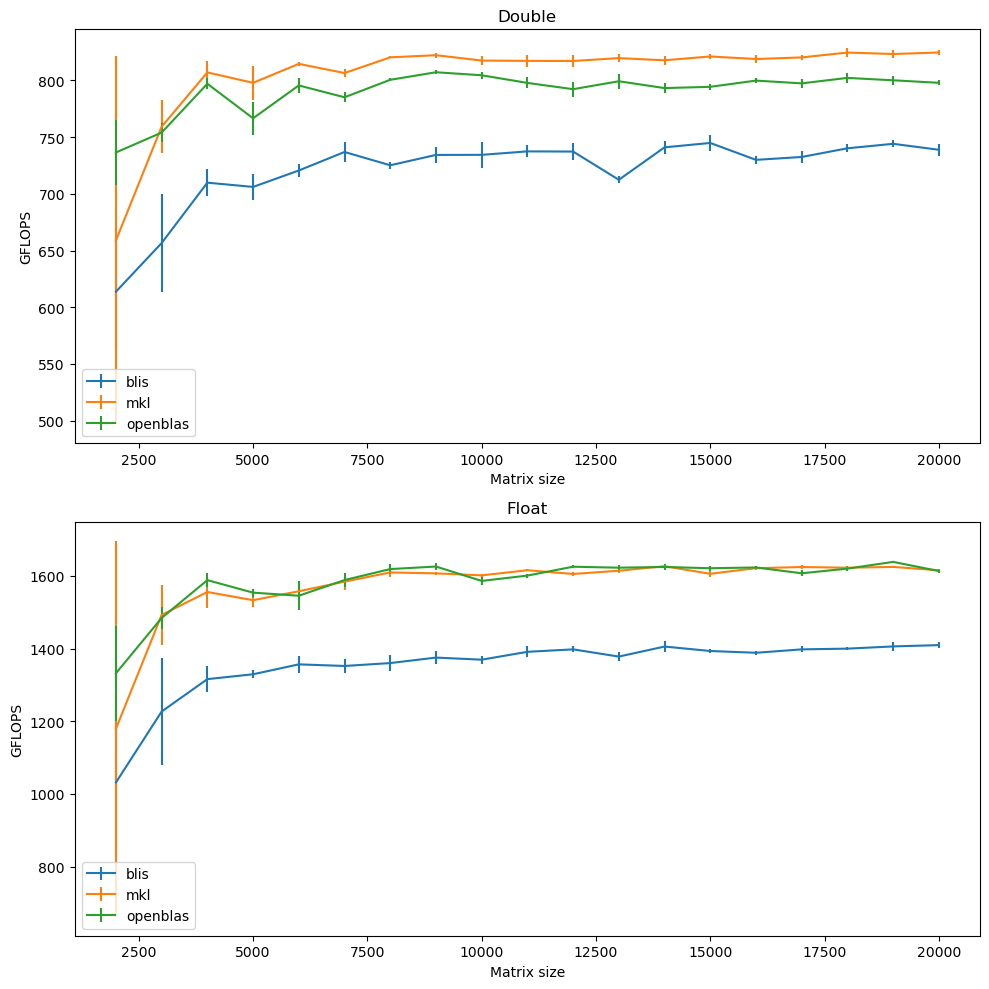

In [13]:
import matplotlib.pyplot as plt

# Iterate over each DataFrame in the merged_dataframes dictionary
for path, df in merged_dataframes.items():
    # Check if 'fixed_size' is in the path
    if 'fixed_cores' in path:
        # Separate the DataFrame into two DataFrames based on the data_type column
        df_double = df[df['data_type'] == 'double.csv']
        df_float = df[df['data_type'] == 'float.csv']

        # Create a figure with two subplots, one for 'double' and one for 'float'
        fig, axs = plt.subplots(2, figsize=(10, 10))

        # Plot the 'double' data
        for library_type in df_double['library_type'].unique():
            df_library = df_double[df_double['library_type'] == library_type]
            axs[0].errorbar(df_library['matrix_size'], df_library['GFLOPS_mean'], yerr=df_library['GFLOPS_sd'], label=library_type)
        axs[0].set_title('Double')
        axs[0].set_xlabel('Matrix size')
        axs[0].set_ylabel('GFLOPS')
        axs[0].legend()

        # Plot the 'float' data
        for library_type in df_float['library_type'].unique():
            df_library = df_float[df_float['library_type'] == library_type]
            axs[1].errorbar(df_library['matrix_size'], df_library['GFLOPS_mean'], yerr=df_library['GFLOPS_sd'], label=library_type)
        axs[1].set_title('Float')
        axs[1].set_xlabel('Matrix size')
        axs[1].set_ylabel('GFLOPS')
        axs[1].legend()

        # Show the plot
        plt.tight_layout()
        plt.show()

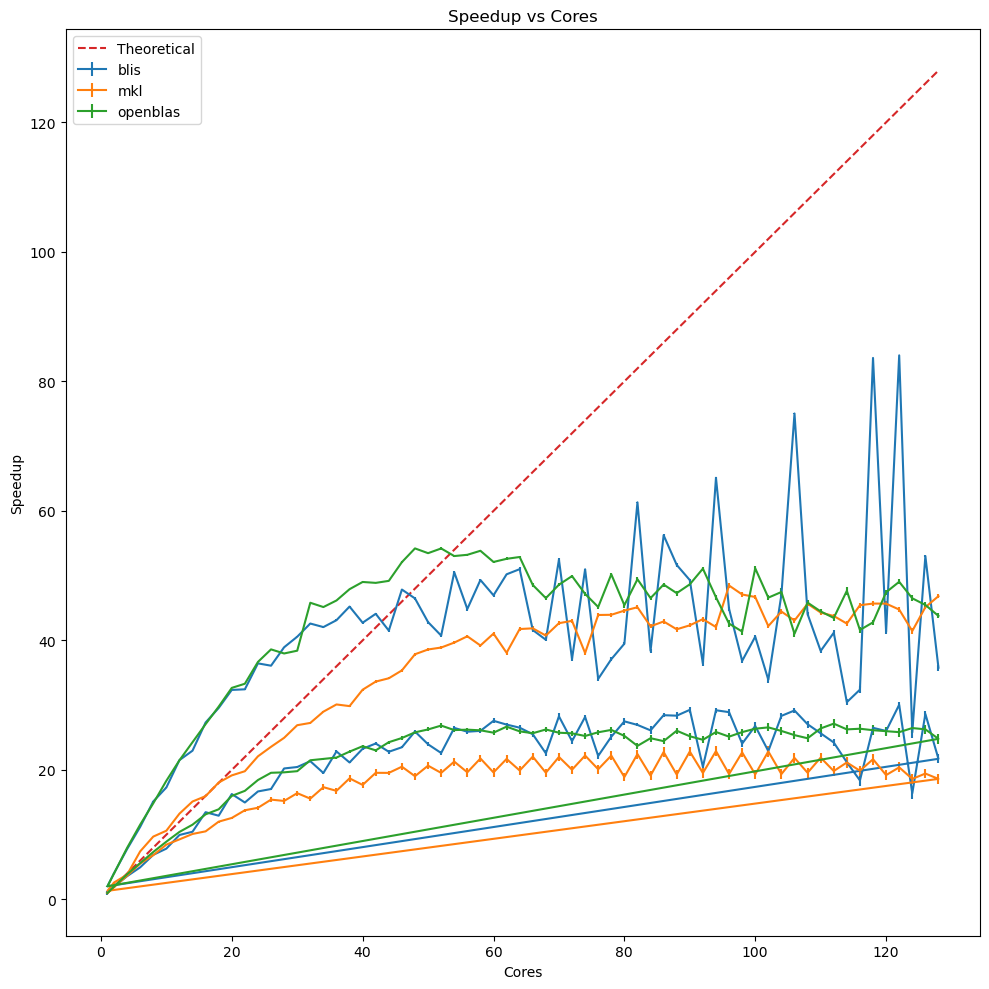

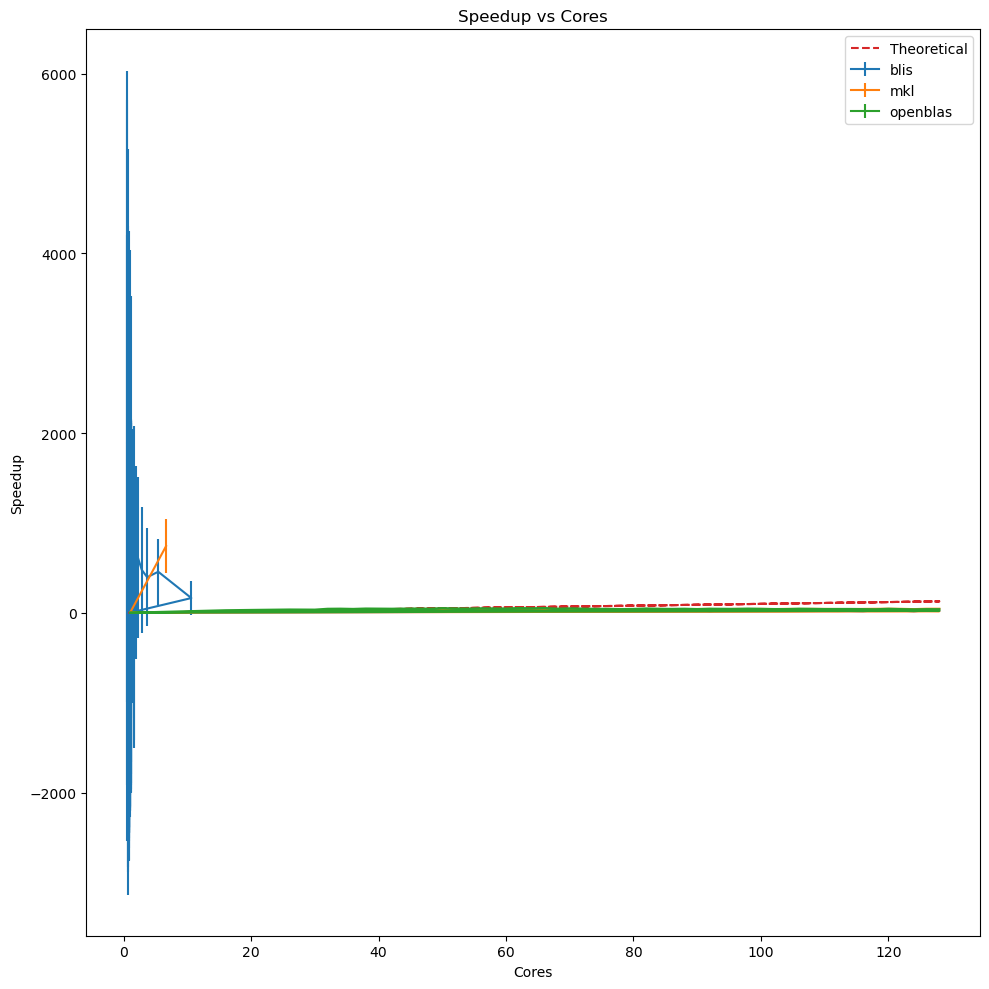

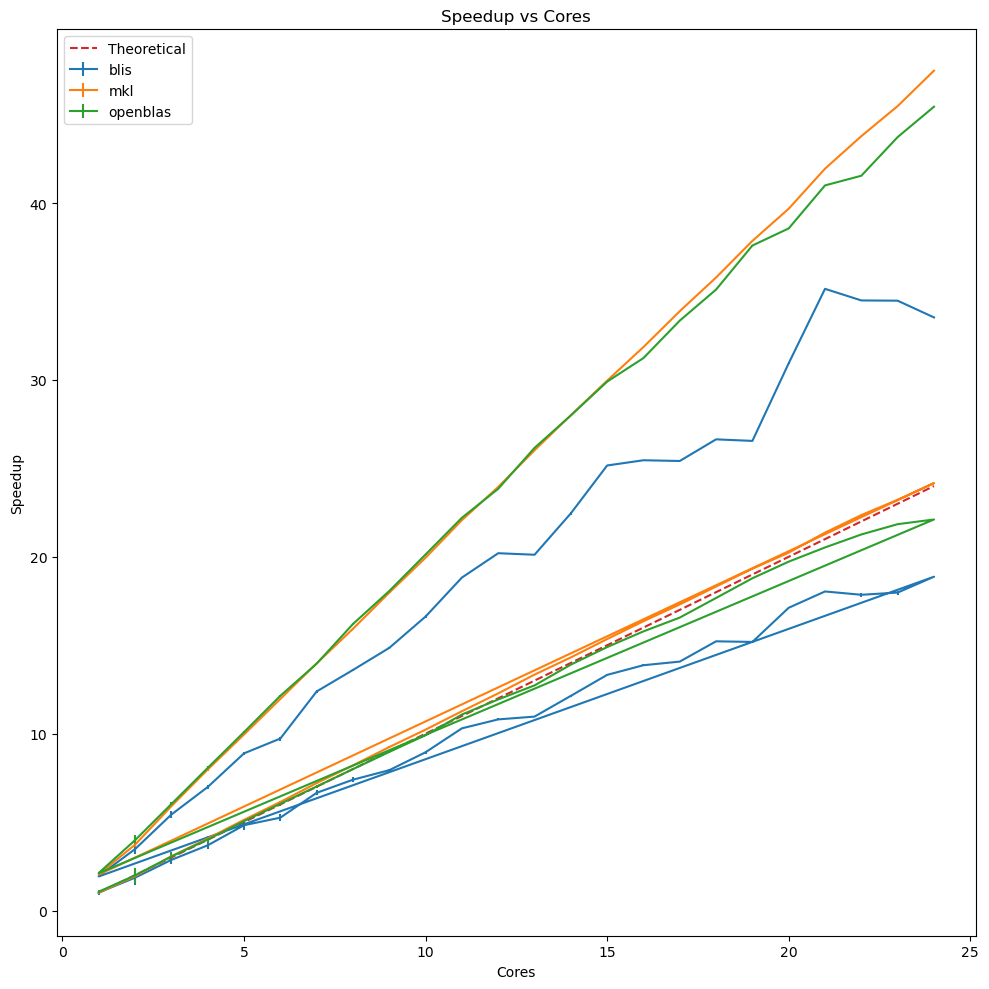

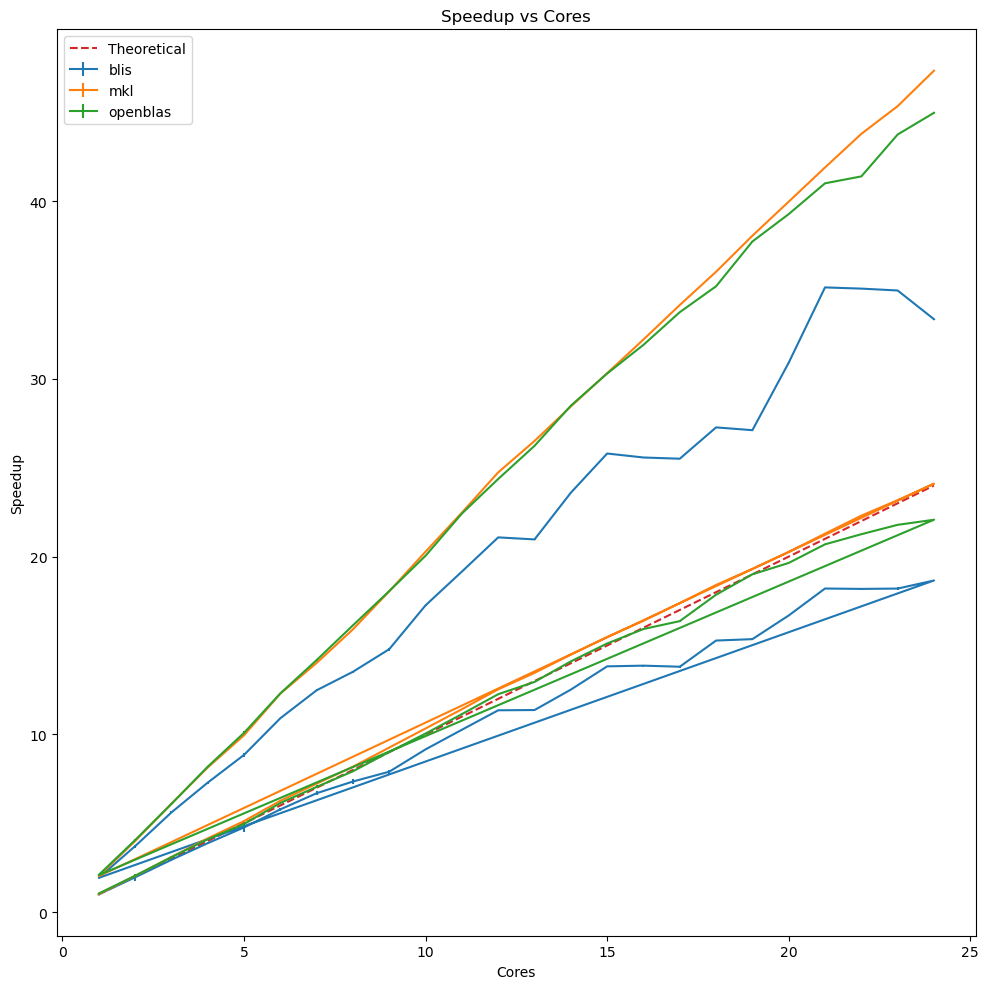

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Iterate over each DataFrame in the merged_dataframes dictionary
for path, df in merged_dataframes.items():
    # Check if 'fixed_size' is in the path
    if 'fixed_size' in path:
        # Assuming that 'time_single_core' is the time taken by the single-core process
        time_single_core = df[df['#cores'] == 1]['time_mean(s)'].values[0]

        # Calculate speedup and theoretical speedup
        df['speedup'] = time_single_core / df['time_mean(s)']
        df['theoretical_speedup'] = df['#cores']

        # Create a figure
        fig, ax = plt.subplots(figsize=(10, 10))

        # Plot the speedup
        for library_type in df['library_type'].unique():
            df_library = df[df['library_type'] == library_type]
            ax.errorbar(df_library['#cores'], df_library['speedup'], yerr=df_library['time_sd'], label=library_type)

        # Plot the theoretical speedup
        ax.plot(df['#cores'], df['theoretical_speedup'], label='Theoretical', linestyle='--')

        # Set title and labels
        ax.set_title('Speedup vs Cores')
        ax.set_xlabel('Cores')
        ax.set_ylabel('Speedup')
        ax.legend()

        # Show the plot
        plt.tight_layout()
        plt.show()